#### Setup

In [3]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
np.set_printoptions(precision=2)

---

#### Revisiting logistic growth (or decay) ... yet again


## Oscillations of the logistic model

Mathematical models like the logistic model are often easier to work with if we **scale** the variables. Basically, this means that we divide each variable by a **characteristic size** of that variable such that the value of the new variable is typically 1. So, in

\begin{equation}
X_{n} = r X_{n-1}(1-\frac{X_{n-1}}{K})
\end{equation}

we can scale $X$ by $K$ and introduce a new variable

\begin{equation}
x_n=\frac{X_{n}}{K}
\end{equation}


Similarly, $X_0$  is replaced by $x_0=X_0/K$. 

Inserting $X_n=Kx_n$ and dividing by K gives


\begin{equation}
x_{n} = r x_{n-1}(1-x_{n-1}), \quad n=0,1,...,N
\end{equation}


This __logistic__ equation is simpler than the original in that the solution lies approximately between $x_0$ and 1 (although values larger than 1 can occur), and there are only two dimensionless input parameters to care about: $r$ and $x_0$ (to solve the original equation we need knowledge of three parameters: $x_0$, $r$, and $K$.).


#### Notes:

* This equation defines the rules, or dynamics, of our system: $x$ represents the population at any given time $t$, and $r$ represents the growth rate. In other words, the population level at any given time is a function of the growth rate parameter and the previous time step’s population level. 
* The equation is non-linear. It can be written as

\begin{equation}
x_{n} = r x_{n-1}-rx_{n-1}^2, \quad n=0,1,...,N
\end{equation}

Note the non-linear term $x_{n-1}^2$.

In [4]:
def logistic(r, x):
    """ Define the logistic map """
    return r * x * (1 - x)

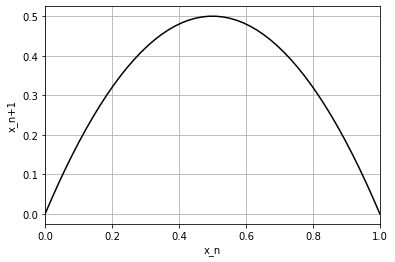

In [5]:
x = np.linspace(0, 1)
fig, ax = plt.subplots(1, 1)
# plot logistic equation using r=2
ax.plot(x, logistic(2, x), 'k')
ax.grid()
ax.set_xlim([0,1])
ax.set_xlabel('x_n')
ax.set_ylabel('x_n+1');

---

Let's try different growth rates

Note that the model always starts with a population level of 0.5 and it’s set up to represent population as a ratio between 0 (extinction) and 1 (the maximum carrying capacity of our system).

In [6]:
# Model parameters
r = 2.5 # growth rate

N = 20 # number of steps
x = np.zeros(N)
x[0] = 0.5 # initial condition
for i in range(1, N):
    x[i] = r*x[i-1] - r*x[i-1]**2


In [7]:
print(f"i:r {r:.4f}")
for j in range(N):
    print(f"{j}   {x[j]:.4f}")

i:r 2.5000
0   0.5000
1   0.6250
2   0.5859
3   0.6065
4   0.5966
5   0.6017
6   0.5992
7   0.6004
8   0.5998
9   0.6001
10   0.5999
11   0.6000
12   0.6000
13   0.6000
14   0.6000
15   0.6000
16   0.6000
17   0.6000
18   0.6000
19   0.6000


What do we see? Population stabilizes. Is that realistic?

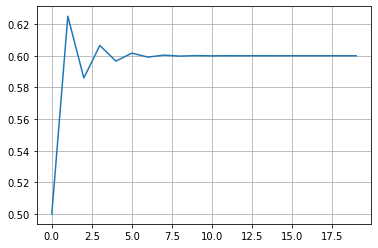

In [8]:
plt.plot(x)
plt.grid()

i:r 2.5000
0   0.3000
1   0.5250
2   0.6234
3   0.5869
4   0.6061
5   0.5968
6   0.6016
7   0.5992
8   0.6004
9   0.5998
10   0.6001
11   0.6000
12   0.6000
13   0.6000
14   0.6000
15   0.6000
16   0.6000
17   0.6000
18   0.6000
19   0.6000


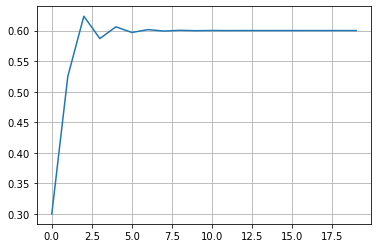

In [9]:
x = np.zeros(N)
x[0] = 0.3 # change initial population (also try 0.9)

for i in range(1, N):
    x[i] = r*x[i-1] - r*x[i-1]**2
print(f"i:r {r:.4f}")
for j in range(N):
    print(f"{j}   {x[j]:.4f}")
plt.plot(x)
plt.grid()

Final population remains the same

So, we can leave initial population the same

Instead look at how equilibrium population depends on growth rate.

In [10]:
# Model parameters
r = [0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 3.7] # growth rate
N = 20 # number of steps
x = np.zeros((N, len(r)))
x[0,:] = 0.5 # initial condition

In [11]:
# Compute the sequence using the difference equation:
for k, rr in enumerate(r):
    for i in range(1, N):
        x[i,k] = rr * x[i-1, k] * (1 - x[i-1, k])
        
print(f"i:r {r[0]:.4f}  {r[1]:.4f}  {r[2]:.4f}  {r[3]:.4f}  {r[4]:.4f}  {r[5]:.4f}  {r[6]:.4f}")
for j in range(N):
    print(f"{j}   {x[j,0]:.4f}, {x[j,1]:.4f}, {x[j,2]:.4f}, {x[j,3]:.4f}, {x[j,4]:.4f}, {x[j,5]:.4f}, {x[j,6]:.4f}")

i:r 0.5000  1.0000  1.5000  2.0000  2.5000  3.0000  3.5000
0   0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000, 0.5000
1   0.1250, 0.2500, 0.3750, 0.5000, 0.6250, 0.7500, 0.8750
2   0.0547, 0.1875, 0.3516, 0.5000, 0.5859, 0.5625, 0.3828
3   0.0258, 0.1523, 0.3419, 0.5000, 0.6065, 0.7383, 0.8269
4   0.0126, 0.1291, 0.3375, 0.5000, 0.5966, 0.5797, 0.5009
5   0.0062, 0.1125, 0.3354, 0.5000, 0.6017, 0.7310, 0.8750
6   0.0031, 0.0998, 0.3344, 0.5000, 0.5992, 0.5900, 0.3828
7   0.0015, 0.0898, 0.3338, 0.5000, 0.6004, 0.7257, 0.8269
8   0.0008, 0.0818, 0.3336, 0.5000, 0.5998, 0.5972, 0.5009
9   0.0004, 0.0751, 0.3335, 0.5000, 0.6001, 0.7217, 0.8750
10   0.0002, 0.0695, 0.3334, 0.5000, 0.5999, 0.6026, 0.3828
11   0.0001, 0.0646, 0.3334, 0.5000, 0.6000, 0.7184, 0.8269
12   0.0000, 0.0605, 0.3333, 0.5000, 0.6000, 0.6069, 0.5009
13   0.0000, 0.0568, 0.3333, 0.5000, 0.6000, 0.7157, 0.8750
14   0.0000, 0.0536, 0.3333, 0.5000, 0.6000, 0.6104, 0.3828
15   0.0000, 0.0507, 0.3333, 0.5000, 0.6000, 0.7135

If you trace down the column under growth rate 1.5, you’ll see the population level settles toward a final value of 0.333… after 20 generations. 

In the column for growth rate 2.0, you’ll see an unchanging population level across each generation. This makes sense in the real world – if two parents produce two children, the overall population won’t grow or shrink. So the growth rate of 2.0 represents the replacement rate.

#### Let’s visualize this

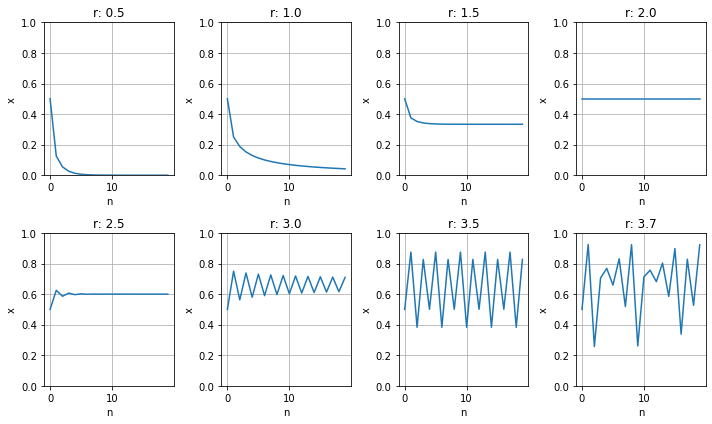

In [12]:
def myplot(N, rvec, mat):
    # plot 
    fig, ax = plt.subplots(2,4, figsize=(10,6))
    i, j, k = 0, 0, 1
    for r in rvec:
        ax[i][j].plot(range(N), mat[:,k-1])
        ax[i][j].set_xlabel('n')
        ax[i][j].set_ylabel('x')
        ax[i][j].set_ylim([0,1])
        ax[i][j].set_title('r: '+str(r))
        ax[i][j].grid()
        if k == 4: 
            i += 1
        j += 1
        if k == 4: 
            j = 0
        k += 1
    plt.tight_layout()            

myplot(N, r, x)

Here you can easily see how the population changes over time, given different growth rates. r = 0.5 quickly drops to zero. The population dies out. 

r = 2.0 (remember, the replacement rate) and it stays steady at a population level of 0.5. 

The growth rates of 3.0 and 3.5 are more interesting. r = 3.0 seems to be slowly converging toward a stable value, r = 3.5 just seems to bounce around.

What about r = 3.7?


---

Let's look more closely at how the equilibrium population changes as r changes

So, let's plot equilibrium population vs r. 

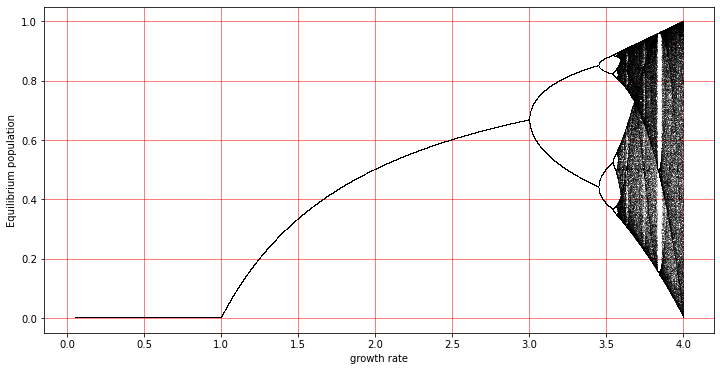

In [13]:
n = 10000
r = np.linspace(0.05, 4.0, n)

# We use 1000 iterations of the logistic map and 
# keep the last 100 iterations to display the bifurcation diagram:

iterations = 1000
last = 100

# We initialize our system with the same initial 
# condition x0=0.5, but could use also, say, x0=0.00001:

x = 0.5 * np.ones(n)

fig, ax = plt.subplots(1, 1, figsize=(12, 6), sharex=True)
for i in range(iterations):
    x = logistic(r, x)
    # We display the bifurcation diagram.
    if i >= (iterations - last):
        ax.plot(r, x, ',k', alpha=.25)
        
ax.set_ylabel('Equilibrium population')
ax.set_xlabel('growth rate');
ax.grid(color='r', linestyle='-', linewidth=0.5)

At r = 3, eq. population oscillates between two value, changing every 2 time units (say years)

At around 3.4 the oscillation now oscillates between 4 values

At around 3.45 the oscillation now oscillates between 8 values

These are known as period-doubling bifurcations.

Then comes, 16, 32, 64 and then at r = 3.57 ... __chaos__ ...the population never settles down!

At 3.83, we get order again. eq. population oscillates with a period of 3 years, the 6, 24 and then again __chaos__.

One observes "windows" of regularity among the chaos!

## Chaos

__A chaotic dynamical system is highly sensitive to initial conditions__; small perturbations at any given time yield completely different trajectories. The trajectories of a chaotic system tend to have complex and unpredictable behaviors.

Many real-world phenomena are chaotic, particularly those that involve nonlinear interactions among many agents (complex systems). Examples can be found in meteorology, economics, biology, and other disciplines.

The __logistic map__ is a famous chaotic system and is another name for the difference logistic equation defined above. 

\begin{equation}
x_{n} = r x_{n-1}(1-x_{n-1}), \quad n=0,1,...,N
\end{equation}


The __logistic map__ provides an example of how chaos can arise from a very simple nonlinear equation. The logistic map models the evolution of a population, taking into account both reproduction and density-dependent mortality (starvation).

#### Chaos vs Randomness

It can be hard to tell if certain time series are chaotic or just random when you don’t fully understand their underlying dynamics. 

__Chaos is deterministic but it looks random.__


#### The butterfly effect

What does it mean to say that chaotic systems are characterized by their sensitive dependence on initial conditions? It means that they don’t have a basin of attraction that collects nearby points over time into a fixed-point or limit cycle attractor. Rather, with a strange attractor, close points diverge over time.

This makes real-world modeling and prediction difficult, because you must measure the parameters and system state with __infinite precision__. Otherwise, tiny errors in measurement or rounding are compounded over time until the system is thrown drastically off. It was through one such rounding error that __E. Lorenz__ first discovered chaos and said: “the present determines the future, but the approximate present does not approximately determine the future.”


As an example of this, let’s run the logistic model with two very similar initial population values:

In [14]:
# Model parameters
r = [3.75] # growth rate
N = 60 # number of steps
x1 = np.zeros(N)
x2 = np.zeros(N)
x1[0] = 0.5 # initial condition
x2[0] = 0.50001 # initial condition

# Compute the sequence using the difference equation:
for k,rr in enumerate(r):
    for i in range(1,N):
        x1[i] = rr*x1[i-1]*(1-x1[i-1])
        x2[i] = rr*x2[i-1]*(1-x2[i-1])

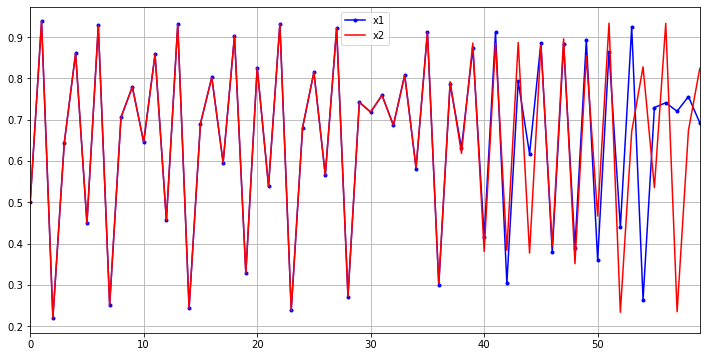

In [15]:
#for j in range(N):
#    print(f"{j}, {x1[j]:2f}, {x2[j]:2f}")

fig, ax = plt.subplots(figsize=(12,6))
ax.plot(range(N), x1, color='b', marker=".", label='x1')
ax.plot(range(N), x2, color='r', label='x2')
ax.grid()
plt.legend()
ax.set_xlim([0, N-1]);

Both have the same growth rate parameter, 3.75. The blue line represents an initial population value of 0.5. The red line represents an initial population of 0.50001. These two initial conditions are extremely similar to one another. Accordingly their results look essentially identical for the first 30 generations. After that, however, the minuscule difference in initial conditions starts to compound. By the 40th generation the two lines show little in common.


If our knowledge of these two systems started at generation 50, we would have no way of guessing that they were almost identical in the beginning. 

__With chaos, history is lost to time and prediction of the future is only as accurate as your measurements.__

In real-world chaotic systems, measurements are never infinitely precise, so errors always compound, and the future becomes entirely unknowable given long enough time horizons.

This is famously known as the butterfly effect: a butterfly flaps its wings in China and sets off a tornado in Texas. Small events compound and irreversibly alter the future of the universe. In the line chart above, a tiny fluctuation of 0.00001 makes an enormous difference in the behavior and state of the system 50 generations later.



#### The Implications of Chaos

Real-world chaotic and fractal systems include leaky faucets, ferns, heart rates, and random number generators. Many scholars have studied the implications of chaos theory for the social sciences, cities, and urban planning. Chaos fundamentally indicates that there are limits to knowledge and prediction. Some futures may be unknowable with any precision. Deterministic systems can produce wildly fluctuating and non-repeating behavior. Interventions into a system may have unpredictable outcomes even if they initially change things only slightly, as these effects compound over time.



### References

References:
* James Gleick, __Chaos__

* May, R. Simple mathematical models with very complicated dynamics. Nature 261, 459–467 (1976). https://doi.org/10.1038/261459a0

* Robert Shaw, The Dripping Faucet as a Model Chaotic System
https://archive.org/details/ShawRober...

* Crevier DW, Meister M. Synchronous period-doubling in flicker vision of salamander and man.
J Neurophysiol. 1998 Apr;79(4):1869-78.

* Bing Jia, Huaguang Gu, Li Li, Xiaoyan Zhao. Dynamics of period-doubling bifurcation to chaos in the spontaneous neural firing patterns Cogn Neurodyn (2012) 6:89–106 DOI 10.1007/s11571-011-9184-7

* A Garfinkel, ML Spano, WL Ditto, JN Weiss. Controlling cardiac chaos
Science  28 Aug 1992: Vol. 257, Issue 5074, pp. 1230-1235 DOI: 10.1126/science.1519060

* R. M. May, D. M. G. Wishart, J. Bray and R. L. Smith Chaos and the Dynamics of Biological Populations
Source: Proceedings of the Royal Society of London. Series A, Mathematical and Physical Sciences, Vol. 413, No. 1844, Dynamical Chaos (Sep. 8, 1987), pp. 27-44

* Chialvo, D., Gilmour Jr, R. & Jalife, J. Low dimensional chaos in cardiac tissue. Nature 343, 653–657 (1990). https://doi.org/10.1038/343653a0

* Xujun Ye, Kenshi Sakai. A new modified resource budget model for nonlinear dynamics in citrus production. Chaos, Solitons and Fractals 87 (2016) 51–60

* Libchaber, A. & Laroche, C. & Fauve, Stephan. (1982). Period doubling cascade in mercury, a quantitative measurement. http://dx.doi.org/10.1051/jphyslet:01.... 43. 10.1051/jphyslet:01982004307021100. 
